# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Step 0: Load The Data

In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from sklearn.utils import shuffle
# Visualizations will be shown in the notebook.
%matplotlib inline

print("Imported.")

Imported.


In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/kamil/CarND/Traffic-Signs-Data/train.p"
testing_file = "/home/kamil/CarND/Traffic-Signs-Data/test.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print('Done')

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

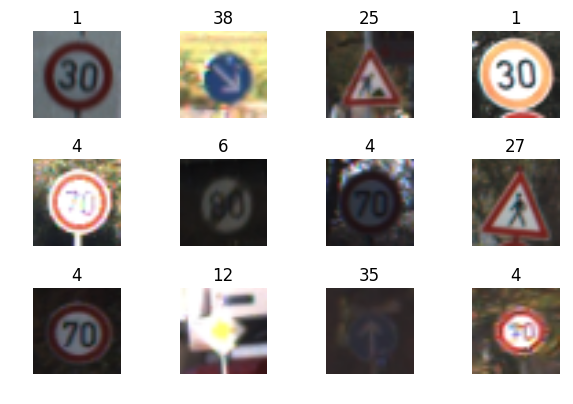

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
rows = 3
cols = 4

fig, axs = plt.subplots(rows, cols)
plt.tight_layout()
for i in range (rows):
    for j in range (cols):
        index = np.random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        label = y_train[index]
        
        axs[i,j].imshow(image)
        axs[i,j].axis('off')
        axs[i,j].set_title(label)

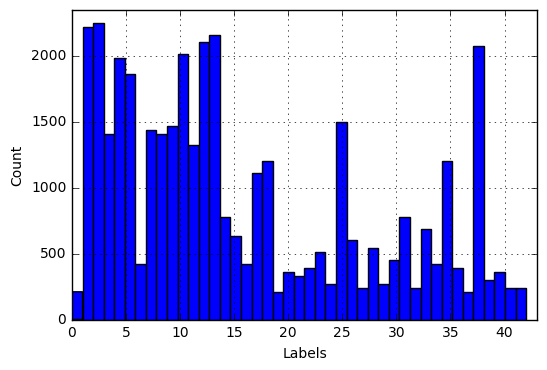

In [5]:
n, bins, patches = plt.hist(y_train, bins=n_classes)

plt.xlabel('Labels')
plt.ylabel('Count')
plt.axis([0, n_classes, 0, np.amax(n)+100])
plt.grid(True)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. Conver images to grayscale (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)). It change their shape from 32x32x3 to 32x32. I did it because I read in Sermanet and LeCun article that grayscale gives better results than 3 channel color.
2. Change shape images from 32x32 to 32x32x1 (shape of first layer in LeNet Architecture).
3. Normalize data to range <-1,1>. By normalization I mean changing values to be in specified range. I haven't check mean of all values. It was mention durign the course and I read in other stuff about machine learning that normalization data values can help in getting good results.

In [7]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

Final shape = (32, 32, 1)


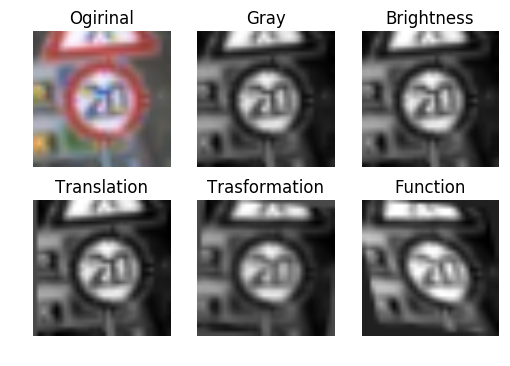

In [8]:
def image_translation(image):
    rows, cols = image.shape
   
    delta = 2
    dx = np.random.randint(-delta,delta)
    dy = np.random.randint(-delta,delta)
    
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(image,M,(cols,rows), borderValue = (128,128,128))
    
    return dst

def image_affine_trasformation(image):
    rows, cols = image.shape
    
    max_change = 1.5
    
    x1 = cols/3
    y1 = rows/3
    x2 = cols*2/3
    y2 = rows/3
    x3 = cols/2
    y3 = rows*2/3
    
    pts1 = np.float32([[x1,y1],[x2,y2],[x3,y3]])
    pts2 = np.float32([[x1+random(max_change),y1+random(max_change)],
                       [x2+random(max_change),y2+random(max_change)],
                       [x3+random(max_change),y3+random(max_change)]])
   
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(image,M,(cols,rows), borderValue = (128,128,128))
    
    return dst

def image_to_gray(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dst = gray
    return dst

def image_change_brightness(image, max_change = 50):
    delta = np.random.randint(0, max_change, dtype='uint8')
    dst = np.where((255-image) < delta, 255, (image+delta))
    return dst

def image_add_dimension(image):
    dst = np.expand_dims(image, axis=2)
    return dst

def image_transformation(gray_image):
    brightness = image_change_brightness(gray_image)
    translation = image_translation(brightness)
    dst = image_affine_trasformation(translation)
    return dst

def random(max_value):
    delta = np.random.randint(-max_value, max_value)
    return delta

gray = image_to_gray(X_train[2])
brightness = image_change_brightness(gray)
translation = image_translation(brightness)
trasformation = image_affine_trasformation(translation)

image_function_transformation = image_transformation(gray)

test = image_add_dimension(trasformation)


print("Final shape =", test.shape)

plt.subplot(231)
plt.axis('off')
plt.title('Ogirinal')
plt.imshow(X_train[2])
plt.subplot(232)
plt.axis('off')
plt.title('Gray')
plt.imshow(gray, cmap='gray')
plt.subplot(233)
plt.axis('off')
plt.title('Brightness')
plt.imshow(brightness, cmap='gray')
plt.subplot(234)
plt.axis('off')
plt.title('Translation')
plt.imshow(translation, cmap='gray')
plt.subplot(235)
plt.axis('off')
plt.title('Trasformation')
plt.imshow(trasformation, cmap='gray')
plt.subplot(236)
plt.axis('off')
plt.title('Function')
plt.imshow(image_function_transformation, cmap='gray')
plt.show()

In [9]:
# change all images to gray

X_train_gray_list = []

for i in range (len(X_train)):
    gray = image_to_gray(X_train[i])
    X_train_gray_list.append(gray)

X_train_gray = np.asarray(X_train_gray_list)
print('Shape: ', X_train_gray.shape)


Shape:  (39209, 32, 32)


In [10]:
# create additional data
minimum_number_of_samples = 1000

new_X_list = []
new_y_list = []

for n in range (n_classes):
    samples_n = np.where(y_train == n)
    number_of_samples = len(samples_n[0])
    print ('label, number of samles:', n, number_of_samples)
    if number_of_samples < minimum_number_of_samples:
        for i in range (minimum_number_of_samples - number_of_samples):
            y_index = np.random.randint(0, number_of_samples-1)
            x_index = samples_n[0][y_index]
            new_image = image_transformation(X_train_gray[x_index])

            new_y_list.append(n)
            new_X_list.append(new_image)
        print('added:', len(new_X_list))
        
new_y = np.asarray(new_y_list)
new_X = np.asarray(new_X_list)
print('Shape new_X, new_y', new_X.shape, new_y.shape)

label, number of samles: 0 210
added: 790
label, number of samles: 1 2220
label, number of samles: 2 2250
label, number of samles: 3 1410
label, number of samles: 4 1980
label, number of samles: 5 1860
label, number of samles: 6 420
added: 1370
label, number of samles: 7 1440
label, number of samles: 8 1410
label, number of samles: 9 1470
label, number of samles: 10 2010
label, number of samles: 11 1320
label, number of samles: 12 2100
label, number of samles: 13 2160
label, number of samles: 14 780
added: 1590
label, number of samles: 15 630
added: 1960
label, number of samles: 16 420
added: 2540
label, number of samles: 17 1110
label, number of samles: 18 1200
label, number of samles: 19 210
added: 3330
label, number of samles: 20 360
added: 3970
label, number of samles: 21 330
added: 4640
label, number of samles: 22 390
added: 5250
label, number of samles: 23 510
added: 5740
label, number of samles: 24 270
added: 6470
label, number of samles: 25 1500
label, number of samles: 26 600


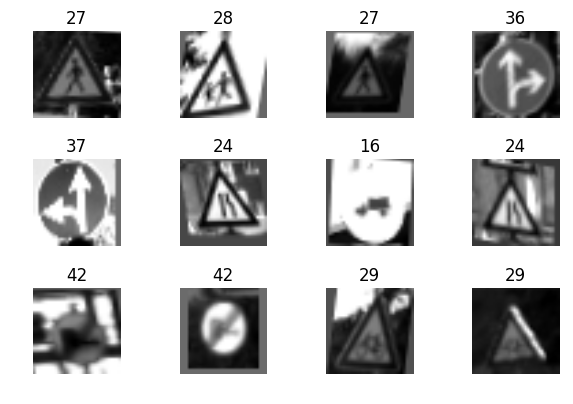

In [11]:
# show examples of new data
rows = 3
cols = 4

fig, axs = plt.subplots(rows, cols)
plt.tight_layout()
for i in range (rows):
    for j in range (cols):
        index = np.random.randint(0, len(new_X))
        image = new_X[index].squeeze()
        label = new_y[index]
        
        axs[i,j].imshow(image, cmap='gray')
        axs[i,j].axis('off')
        axs[i,j].set_title(label)

Shape (54710, 32, 32) (54710,)


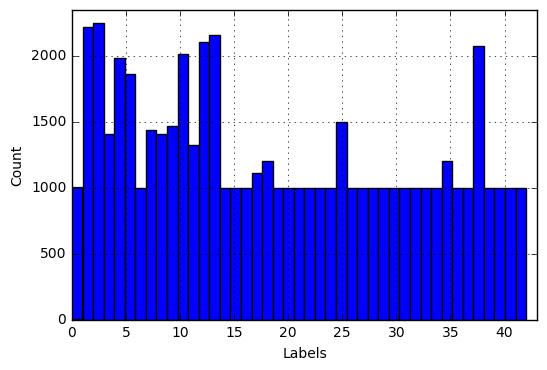

In [12]:
X_all_train = np.concatenate((X_train_gray, new_X), axis=0)
y_all_train = np.concatenate((y_train, new_y), axis=0)
print('Shape', X_all_train.shape, y_all_train.shape)

n, bins, patches = plt.hist(y_all_train, bins=n_classes)

plt.xlabel('Labels')
plt.ylabel('Count')
plt.axis([0, n_classes, 0, np.amax(n)+100])
plt.grid(True)
plt.show()

In [13]:
# change all images to gray and dimensions 32x32x1
X_add_dimension_list = []

for i in range (len(X_all_train)):
    dim = image_add_dimension(X_all_train[i])
    X_add_dimension_list.append(dim)

X_train_dimensions = np.asarray(X_add_dimension_list)
print('X_train_dimensions shape: ', X_train_dimensions.shape)

X_train_dimensions shape:  (54710, 32, 32, 1)


In [14]:
# change test data to gray and to dimensions 32x32x1
X_test_dimensions_list = [] 

for i in range (len(X_test)):
    gray = image_to_gray(X_test[i])
    dim = image_add_dimension(gray)
    X_test_dimensions_list.append(dim)

X_test_dimensions = np.asarray(X_test_dimensions_list)
print('X_test_dimensions shape: ', X_test_dimensions.shape)

X_test_dimensions shape:  (12630, 32, 32, 1)


In [15]:
# Normalize data
X_train_normalized = (X_train_dimensions - 127.5)/127.5 
X_test_normalized = (X_test_dimensions - 127.5)/127.5
print('Shape', X_train_normalized.shape, X_test_normalized.shape)
print('First element', X_train_dimensions[0][0][0], X_test_dimensions[0][0][0])
print('First element', X_train_normalized[0][0][0], X_test_normalized[0][0][0])

Shape (54710, 32, 32, 1) (12630, 32, 32, 1)
First element [78] [147]
First element [-0.38823529] [ 0.15294118]


In [16]:
from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_all_train)
print('Shuffled.')

Shuffled.


In [17]:
# Create validation data (split train)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# http://stackoverflow.com/questions/40704484/importerror-no-module-named-model-selection
from sklearn import cross_validation

X_train, X_validation, y_train, y_validation = cross_validation.train_test_split(X_train_normalized, y_train, test_size=0.3)

print('X_train, y_train', X_train.shape, y_train.shape)
print('X_validation, y_validation', X_validation.shape, y_validation.shape)


X_train, y_train (38297, 32, 32, 1) (38297,)
X_validation, y_validation (16413, 32, 32, 1) (16413,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I generated additional data. 
I saw that there are big differences in number of testing examples. If class had less than 1000 samples I added additional samples. I did it by creating copies of random samples and then apply on it some geometric transformations (changing brightness, shifting of object's location and affine transformation). I used to it cv2 library.

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [19]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 100

### LeNet Lab Solution
LeNet Architecture

In [20]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I used LeNet architecture, which was showed during course. I choosed it, because preproccesing and adding additional data took me a lot of time. I decied I will see what results I'll get with LeNet and if it will be over 90% than I will stay with this. It works :) So I just needed to change number of final outputs to number of classes (43).

Input: The LeNet architecture accepts a 32x32xC image as input. In my case I have grayscale images, so it's 32x32x1.

1. Layer 1: Convolutional. Output shape: 28x28x6.
2. Activation. - ReLU.
3. Pooling. Output shape: 14x14x6.
4. Layer 2: Convolutional. Output shape: 10x10x16.
5. Activation - ReLU.
6. Pooling. Output shape: 5x5x16.
7. Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
8. Layer 3: Fully Connected. Number of outputs: 120.
9. Activation - ReLU.
10. Layer 4: Fully Connected. Number of outputs: 84.
11. Activation - ReLU.
12. Layer 5: Fully Connected (Logits). Number of outputs: 43.

In [22]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Training Pipeline

In [23]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.733

EPOCH 2 ...
Validation Accuracy = 0.854

EPOCH 3 ...
Validation Accuracy = 0.905

EPOCH 4 ...
Validation Accuracy = 0.931

EPOCH 5 ...
Validation Accuracy = 0.931

EPOCH 6 ...
Validation Accuracy = 0.936

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.953

EPOCH 10 ...
Validation Accuracy = 0.959

EPOCH 11 ...
Validation Accuracy = 0.949

EPOCH 12 ...
Validation Accuracy = 0.956

EPOCH 13 ...
Validation Accuracy = 0.960

EPOCH 14 ...
Validation Accuracy = 0.966

EPOCH 15 ...
Validation Accuracy = 0.967

EPOCH 16 ...
Validation Accuracy = 0.969

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.968

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.971

Model saved


In [27]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.908


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Adam optimizer
- EPOCHS = 20
- BATCH_SIZE = 100
- mu = 0
- sigma = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I focused on good preproccesing the data and adding additional data. I mainly based od course and Sermanet and LeCun article. I'm new in Python so it took my a lot or work and time. Then I used LeNet architecture, which also was presented during the course. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

(5, 32, 32, 3)
My signals:


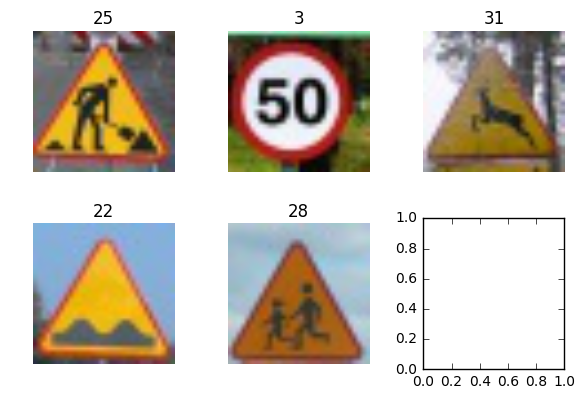

In [50]:
my_signs = []
my_labels = [25, 3, 31, 22, 28]

for i in range (1,6):
    file = "/home/kamil/CarND/CarND-Traffic-Sign-Classifier-Project/Signs/R0" + str(i) + ".jpg"
    image = mpimg.imread(file)
    my_signs.append(image)
    
my_signs = np.asarray(my_signs)
print(my_signs.shape)
print('My signals:')

rows = 2
cols = 3
index = 0

fig, axs = plt.subplots(rows, cols)
plt.tight_layout()
for i in range (rows):
    for j in range (cols):
        if index < 5:
            image = my_signs[index].squeeze()
            label = my_labels[index]
            index = index + 1

            axs[i,j].axis('off')
            axs[i,j].imshow(image)
            axs[i,j].set_title(label)


In [51]:
# change all images to gray, add dimension and normalize
my_signs_gray = []

for i in range (len(my_signs)):
    gray = image_to_gray(my_signs[i])
    
    
    
    dim = image_add_dimension(gray)
    my_signs_gray.append(dim)

my_signs_gray = np.asarray(my_signs_gray)
my_signs_normalized = (my_signs_gray - 127.5)/127.5
print('First element gray', my_signs_gray[0][0][0])
print('First element norm', my_signs_normalized[0][0][0])
print('Shape: ', my_signs_normalized.shape)


First element gray [54]
First element norm [-0.57647059]
Shape:  (5, 32, 32, 1)


In [52]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(my_signs_normalized, my_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.200


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I think that quality of image is good and similiar to train data. 
I'm from Poland, so I got images of polish signs. Main difficulty may be differences of shape of polish and US (train) signs.

In [53]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Unexpectedly I get only 20% accuracy, which means only 1 of 5 images was predicted correctly. I thought it will be better, and at least 3 images will be correct. So I meantion before, I thint bad accuracy is a result of differences in shape of polish and train signs.

In [55]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [56]:
top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    predictions = sess.run(top_predictions, feed_dict={x: my_signs_normalized})
    
    
    
    for i in range(len(my_signs_normalized)):
        prediction1 = predictions[1][i][0]
        prediction2 = predictions[1][i][1]
        prediction3 = predictions[1][i][2]
        probability1 = predictions[0][i][0]
        probability2 = predictions[0][i][1]
        probability3 = predictions[0][i][2]
    
        print('Image: ', i, 'Label: ', my_labels[i])
        print('Prediction one:', prediction1, 'Probability:', probability1)
        print('Prediction two:', prediction2, 'Probability:', probability2)
        print('Prediction three:', prediction3, 'Probability:', probability3)

Image:  0 Label:  25
Prediction one: 20 Probability: 0.999974
Prediction two: 27 Probability: 2.49093e-05
Prediction three: 24 Probability: 1.25662e-06
Image:  1 Label:  3
Prediction one: 0 Probability: 1.0
Prediction two: 1 Probability: 1.62492e-16
Prediction three: 40 Probability: 1.74901e-25
Image:  2 Label:  31
Prediction one: 31 Probability: 0.837459
Prediction two: 33 Probability: 0.0756691
Prediction three: 42 Probability: 0.0747692
Image:  3 Label:  22
Prediction one: 24 Probability: 0.767671
Prediction two: 26 Probability: 0.230253
Prediction three: 8 Probability: 0.00107224
Image:  4 Label:  28
Prediction one: 23 Probability: 0.417616
Prediction two: 18 Probability: 0.336138
Prediction three: 11 Probability: 0.164494


**Answer:**
In 2 of 5 [image 0 and 1] samples there are main large predictions with almost 100%. However, in both cases they are wrong.
In another 2 of 5 [images 2 and 3] samples main prediction is quite big, but next one also has few percents. One of prediction is correct, one wrong.
In last sample [image 4] first and second prediction has similar probalility (41 and 33%). But both are incorrect.
It is surprising for me that in samples where final prediction is wrong, it's still gives big probablity to one or two images. I thought that in wrong resuls probalilities will be similiar to few predictions and one of them will be the good one.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.